<img>
<html>
  <head>
  </head>

  <body>
    <img src="images/spam.jpg">
  </body>
</html>

I've got an email classification dataset, where each row is an email and every column contains a word that has been found in the emails with values indicating how many words there are. This summary of the data sets is provided:

- Number of Rows: 5171 (each row represents an email)
- Number of Columns: 4 (1 column for email name, 1 column for words or text, 1 column for labels)
- First Column: Email name (encoded with numbers for privacy)
- Last Column: Labels for prediction (1 for spam, 0 for not spam)
- This data set is appropriate for text classification and, in particular, to detect spam. I've used techniques like Naive Bayes and Decision
- Trees to create a model predicting whether an email is spam or not because of the word count in it.

---
👋 Greetings, all! *I'm Sajjad Ali Shah*, and I'd want to introduce myself to you. I'm a young data scientist that appreciates using data to acquire valuable insights and make critical decisions. With a strong interest in exploring the domains of data science, I actively participate in many projects and offer my knowledge on platforms such as Kaggle.
🔍 As a young Data Scientist, I'm always seeking for new ways to analyze, understand, and visualize data to solve real-world challenges. My passion for unraveling patterns, discovering trends, and uncovering hidden insights in complex datasets drives my profession in data science.


- Contact: [Linkedin](www.linkedin.com/in/sajjad-ali-shah-120341305)

- Date : 18/09/2024
- Dataset: [Link](https://www.kaggle.com/datasets/venky73/spam-mails-dataset)
---

# **Import the libraries**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [121]:
# Read CSV through pandas 
df=pd.read_csv("./spam dataset/spam_ham_dataset.csv")

In [122]:
# load first 5 dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Check the shape of the dataset

In [123]:
print(f"The number of rows in a dataset {df.shape[0]}")
print(f"The number of columns in a dataset {df.shape[1]}")

The number of rows in a dataset 5171
The number of columns in a dataset 4


In [124]:
# lets see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


- This info tell that there are two numericals and two categoricals Dtype

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


# **Check the Null values**

In [126]:
# Check the null values in a given dataset
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

- No null values in a dataset

In [127]:
# Check the duplicated values 
print(f"Duplicated values in a dataset: {df.duplicated().sum()}")

Duplicated values in a dataset: 0


## Lets check the label column 

In [128]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

- In label column its clearly understand that ham(3672) counting is higher then spam(1499)

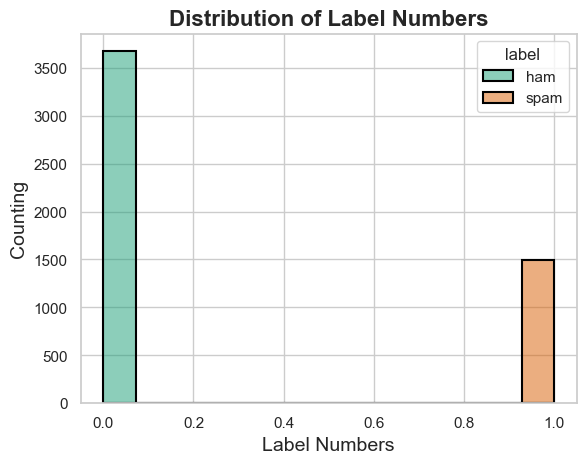

In [129]:
# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=df, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.5)

plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Counting", fontsize=14)

plt.show()


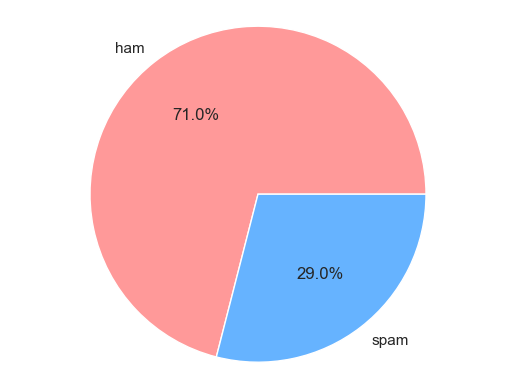

In [130]:
# lets check through pie chart
labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()


# **Data Preprocessing**

In [131]:
# Removing unnecessary  column
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [132]:
# Now lets check dataset again
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
